# Исследование объявлений о продаже квартир

**Описание проекта**

В нашем распоряжении данные о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости.

План работы представлен в оглавлении.

# Оглавление

* [Шаг 1. Общая информация](#chapter1)
    * [Описание данных](#section_1_1)
    * [Предварительный вывод](#section_1_2)
* [Шаг 2. Предобработка данных](#chapter2)
    * [2.1. Проблемы в автоматически собранных данных](#section_2_1)
    * [2.2. Замена значений](#section_2_2)
* [Шаг 3. Добавление полей](#chapter3)
    * [3.1. Цена квадратного метра](#section_3_1)
    * [3.2. День недели, месяц и год публикации ](#section_3_2)
    * [3.3. Этаж квартиры](#section_3_3)
    * [3.4. Соотношение площадей](#section_3_4)
* [Шаг 4. Исследовательский анализ данных](#chapter4)  
    * [4.1. Гистограммы площади, числа комнат и высоты потолков](#section_4_1)
        * [Функция для построения гистограммы по ящику с усами](#section_f)
        * [4.1.0. Гистограммы площади, цены, комнат, и высоты потолков](#section_4_1_0)
        * [4.1.1. Площадь](#section_4_1_1)
        * [4.1.2. Цена](#section_4_1_2)
        * [4.1.3. Число комнат](#section_4_1_3)
        * [4.1.4. Высота потолков](#section_4_1_4)
    * [4.2. Время продажи квартиры](#section_4_2)
    * [4.3. Редкие и выбивающиеся значения](#section_4_3)
    * [4.4. Факторы, влияющие на стоимость квартиры](#section_4_4)
        * [4.4.1. Цена от площади](#section_4_4_1)
        * [4.4.2. Цена от числа комнат](#section_4_4_2)
        * [4.4.3. Цена от расстояния до центра](#section_4_4_3)
        * [4.4.4. Цена от этажа](#section_4_4_4)
        * [4.4.5. Цена продажи от даты размещения](#section_4_4_5)
    * [4.5. Средняя цена за квадратный метр](#section_4_5)
    * [4.6. Граница центра Санкт-Петербурга](#section_4_6)
    * [4.7. Квартиры в центре Санкт-Петербурга](#section_4_7)
        * [4.7.1. Цена в ценре от площади](#section_4_7_1)
        * [4.7.2. Цена в ценре от числа комнат](#section_4_7_2)
        * [4.7.3. Высота потолков](#section_4_7_3)
        * [4.7.4. Цена продажи квартиры в центре от даты размещения](#section_4_7_4)
* [Шаг 5. Общий вывод](#chapter5)
* [Чек-лест готовности проекта](#section_0)


______________________

# Шаг 1. Общая информация <a class="anchor" id="chapter1"></a>

Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('datasets/real_estate_data.csv')

data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Исходные данные оказалиcь склеенными. Разделим их параметром **sep**.

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Описание данных <a class="anchor" id="section_1_1"></a>

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания

In [4]:
data.shape

(23699, 22)

Получили таблицу, в которой 22 столбца и 23699 строк.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в столбцах, заполненных (выбранных) человеком:
- ceiling_height           9195 (нет подходящего значения на замену)
- floors_total               86 (нет подходящего значения на замену)
- living_area              1903 (нет подходящего значения на замену)
- **is_apartment**            20924 (скорее всего, человек не поставил галку в чекбоксе т.к. помещение не является апартаментами: **заменим NaN на False**)
- kitchen_area             2278 (нет подходящего значения на замену)
- **balcony**                 11519 (если человек не указал число балконов — скорее всего, их нет: **заменим NaN на 0**)
- days_exposition          3181 (скорее всего, отсутствовала дата снятия объявления на момент выгрузки, но это не точно. Нет подходящего значения на замену)
- **locality_name**              49 (наличие NaN помешает провести лемматизацию, заменим **NaN на слово "неизвестный"**)


Пропуски в столбцах, полученных автоматически:
- airports_nearest         5542 (нет подходящего значения на замену)
- cityCenters_nearest      5519 (нет подходящего значения на замену)
- parks_around3000         5518 (нет подходящего значения на замену)
- parks_nearest           15620 (нет подходящего значения на замену)
- ponds_around3000         5518 (нет подходящего значения на замену)
- ponds_nearest           14589 (нет подходящего значения на замену)


In [6]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Обнаружились проблемы с типами данных. Разделим их на два типа - с которыми можно что-то сделать, и те, с которыми нельзя.

Можно повлиять на тип данных в полях, где можно предположить логическую замену:
- **first_day_exposition**     object (нужно изменить тип данных на человеческую **дату-время**)
- **is_apartment**             object (после изменения NaN на False станет **bool**)
- **balcony**                 float64 (после изменения NaN на 0 станет **int**)
- **locality_name**            object (в столбце есть Float (NaN))

Нельзя повлиять на тип данных в полях, где нет подходящих значений на замену (из-за NaN, который имеет тип данных float):
- floors_total            float64 
- airports_nearest        float64 
- cityCenters_nearest     float64 
- parks_around3000        float64 
- parks_nearest           float64 
- ponds_around3000        float64 
- ponds_nearest           float64 
- days_exposition         float64 

На всякий случай убедимся, что в таблице отсутствуют дубликаты:

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


На первый взгляд в большинстве полей не всё так плохо - разница между средним и медианой для большинства полей невелика. Хотя в поле **days_exposition** среднее больше медианы почи в 2 раза. Это может быть обусловлено выдающимися значениями вроде 1580. Скоро узнаем. Максимальное количество в 60 этажей тоже настораживает - таких зданий в Питере нет. В Лахта-центре 87 этажей, но он еще не достроен, и в нем нет жилой недвижимости.

## Предварительный вывод <a class="anchor" id="section_1_2"></a>

В столбцах, заполненных автоматически очень много пропусков, особенно что касается расстояний до парков и водоёмов. Нужно указать на этот недостаток коллегам, которые предоставили данные.

Это важные данные, которые могли бы дополнить картину, ведь "стоимость недвижимости определяется тремя факторами: местоположением, местоположением и … местоположением".

К счастью, Питер - город на болоте. Здесь полно и рек и каналов. Даже Маркизова лужа есть. А в окрестностях города полно небольших водоёмов. Парков тоже хватает. Всё плюс-минус близко. Понятно, что стоимость квартиры с видом на Финский залив или Неву будет выше, и чем ближе к центру города, тем сильнее это должно проявляться. К тому же как раз в центре больше всего рек и каналов. 

______________

# Шаг 2. Предобработка данных <a class="anchor" id="chapter2"></a>

## 2.1. Проблемы в автоматически собранных данных <a class="anchor" id="section_2_1"></a>

Очень много пропусков в значениях, полученных автоматически. Можно предположить cледующие возможные причины:
1. В объявлении о продаже квартиры не указан адрес. Странное предположение, т.к. продать квартиру без адреса вряд ли возможно.
2. Квартира в новостройке. Зачастую в новостройках делают новые улицы и присваивают новые номера домов, которых может еще не быть на карте.
3. Расстояния не посчитаны.
4. Какой-то сбой при выгрузке данных.

У нас есть 4 поля, предположительно со схожей проблемой, т.к. количество пропущенных значений в почти одинаково. Это поля:
- airports_nearest         **5542**
- cityCenters_nearest      5519
- parks_around3000         5518
- ponds_around3000         5518

Также есть ещё 2 поля, в которых либо другая проблема, либо несколько проблем: 
- parks_nearest           **15620**
- ponds_nearest           14589

**Предположение 1.**

Если природа пропущенных значений в указанных группах столбцов одинакова, то объединение множеств значений NaN по внешней границе будет приблизительно равно количеству NaN в самом большом из этих множеств.

**Предположение 2.**

Если природа пропущенных значений в указанных группах столбцов НЕ одинакова, то объединение множеств значений NaN по внешней границе будет больше количества NaN в самом большом из этих множеств.

Сделаем два среза данных и посмотрим на количество строк в них.

In [9]:
lot_1 = data.query(
    '("NaN" in airports_nearest)\
    |("NaN" in cityCenters_nearest)\
    |("NaN" in parks_around3000)\
    |("NaN" in ponds_around3000)')
lot_1.shape[0]

5543

Подтвердилось предположение 1, то есть данных нет в одних и тех же строках.

In [10]:
lot_2 = data.query(
    '("NaN" in ponds_nearest)\
    |("NaN" in parks_nearest)')
lot_2.shape[0]

18875

Подтвердилось предположение 2, и за границей пересечения множеств осталось примерно 3000 строк.

Проверим, есть ли пересечения между двумя срезами lot_1 и lot_2:

In [11]:
lot_1.join(lot_2,  lsuffix='_y').shape[0]

5543

Получается, что все индексы из lot_1 есть в lot_2. Вероятно, с расстояниями до парков и водоёмов несколько проблем.

## 2.2. Замена значений <a class="anchor" id="section_2_2"></a>

Заменим пропущенные значения в столбце **balcony** на 0. Сделаем проверку.

In [12]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

Посмотрим, что с полем **is_apartment**. Было предположение, что если чекбокс заполнен, то в нем значение True. Если нет - NaN. Проверим.

In [13]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Предположение не подтвердилось. False присутствует. Но значений в выборке всё равно слишком мало, чтобы экстраполировать соотношение на весь датафрейм и делать какие-то выводы. Можно, пожалуй, заключить только одно: апартаментов значительно меньше. 

Заменим в столбце **locality_name** значения NaN на "неизвестный", чтобы можно было выполнить лемматизацию.

In [14]:
data['locality_name'] = data['locality_name'].fillna('неизвестный')
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Сгруппируем данные по **locality_name** и отсортируем по убыванию количества повторяющихся значений. Выведем топ-30 городов и поселений.

In [15]:
data.groupby('locality_name').count().sort_values(by='last_price',ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
locality_name,,,,,,,,,,,,,,,,,,,,,
Санкт-Петербург,15721,15721,15721,15721,15721,10104,15651,14581,15721,1833,...,15721,14342,15721,15636,15660,15660,7284,15660,7983,13638
посёлок Мурино,522,522,522,522,522,200,520,461,522,54,...,522,422,522,0,0,0,0,0,0,517
посёлок Шушары,440,440,440,440,440,217,439,404,440,58,...,440,398,440,436,436,436,0,436,152,408
Всеволожск,398,398,398,398,398,272,398,371,398,44,...,398,357,398,0,0,0,0,0,0,339
Пушкин,369,369,369,369,369,234,369,345,369,48,...,369,338,369,369,368,369,212,369,177,307
Колпино,338,338,338,338,338,203,338,328,338,44,...,338,322,338,337,337,337,133,337,190,308
посёлок Парголово,327,327,327,327,327,137,327,301,327,41,...,327,289,327,327,327,327,10,327,56,302
Гатчина,307,307,307,307,307,149,307,292,307,44,...,307,294,307,0,0,0,0,0,0,268
деревня Кудрово,299,299,299,299,299,122,299,262,299,48,...,299,231,299,0,0,0,0,0,0,299


Как и следовало ожидать, больше всего недвижимости продаётся в Санкт-Петербурге. Однако, есть и проблема - где-то "посёлок" с буквой Ё, где-то с Е. Есть "деревня Кудрово" и просто "Кудрово"

Посмотрим на данные столбца **locality_name** глазами. К счастью, их не так много.

In [16]:
for row in data['locality_name']:
    print(row)


Санкт-Петербург
посёлок Шушары
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
городской посёлок Янино-1
посёлок Парголово
Санкт-Петербург
посёлок Мурино
Санкт-Петербург
Санкт-Петербург
Ломоносов
Сертолово
Петергоф
Пушкин
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
посёлок Парголово
Санкт-Петербург
деревня Кудрово
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Пушкин
Санкт-Петербург
Коммунар
Санкт-Петербург
Санкт-Петербург
Колпино
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
поселок городского типа Красный Бор
посёлок Мурино
Санкт-Петербург
посёлок Парголово
Санкт-Петербург
Петергоф
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
Гатчина
Санкт-Петербург
Санкт-Петербург
Пушкин
Санкт-Петербург
Санкт-Петербург
посёлок Парголово
Санкт-Петербург
Санкт-Петербург
Санкт-Петербург
посёлок Шушары
Санкт-Петербург
Санкт-Петербург
посёлок Мурино
Санкт-Петербург
Сертолово
Санкт-Петербург
Гатчина
Санкт-Петербург
п

В остальном всё неплохо. Приведим посёлки к общему знаменателю и заменим "деревню Кудрово" на "Кудрово" (это с 2018-го года официально город).

In [17]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [18]:
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово','Кудрово')

Выведем топ-5 по количеству объявлений.

In [19]:
data.groupby('locality_name').count().sort_values(by='last_price',ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
locality_name,,,,,,,,,,,,,,,,,,,,,
Санкт-Петербург,15721,15721,15721,15721,15721,10104,15651,14581,15721,1833,...,15721,14342,15721,15636,15660,15660,7284,15660,7983,13638
поселок Мурино,556,556,556,556,556,214,552,492,556,73,...,556,450,556,2,2,2,0,2,2,551
Кудрово,472,472,472,472,472,195,470,424,472,57,...,472,389,472,0,0,0,0,0,0,441
поселок Шушары,440,440,440,440,440,217,439,404,440,58,...,440,398,440,436,436,436,0,436,152,408
Всеволожск,398,398,398,398,398,272,398,371,398,44,...,398,357,398,0,0,0,0,0,0,339


Кудрово переместилось на 3-ю строчку.

Переведем значения в поле **first_day_exposition** в формат даты, отбросив часть с временем, т.к. она не заполнена.

In [20]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [21]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

# Шаг 3. Добавление полей <a class="anchor" id="chapter3"></a>

## 3.1. Цена квадратного метра <a class="anchor" id="section_3_1"></a>

Посчитаем и добавим в таблицу столбец **sqr_meter_price** с ценой квадратного метра. Выведем первые 5 строк столбца.

In [22]:
data['sqr_meter_price'] = (data['last_price']/data['total_area']).round(0)
data['sqr_meter_price'].head()

0    120370.0
1     82921.0
2     92786.0
3    408176.0
4    100000.0
Name: sqr_meter_price, dtype: float64

## 3.2. День недели, месяц и год публикации <a class="anchor" id="section_3_2"></a>

Найдем и добавим в таблицу год публикации. Столбец назовём **year_exposition**. Выведем первые 5 строк столбца.

In [23]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data['year_exposition'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_exposition, dtype: int64

Найдем и добавим в таблицу месяц публикации. Столбец назовём **month_exposition**. Выведем первые 5 строк столбца.

In [24]:
data['month_exposition'] = data['first_day_exposition'].dt.month
data['month_exposition'].head()

0     3
1    12
2     8
3     7
4     6
Name: month_exposition, dtype: int64

Найдем и добавим в таблицу день недели публикации. Столбец назовём **weekday_exposition**. Выведем первые 5 строк столбца.

In [25]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['weekday_exposition'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday_exposition, dtype: int64

## 3.3. Этаж квартиры <a class="anchor" id="section_3_3"></a>

Создадим столбец **floor_name**. В качестве значений получим варианты "первый", "последний", "другой".

In [26]:
def floor_ident(row):
    """
    Возвращает строковое значение в зависимости от значений в
    полях 'floor' и 'floors_total'.
    """
    if row['floor'] == 1:
        val = 'первый'
    elif (row['floor'] == row['floors_total']):
        val = 'последний'
    else:
        val = 'другой' 
    return (val)
data['floor_name'] = data.apply(floor_ident, axis=1)
data['floor_name'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_name, dtype: int64

## 3.4. Соотношение площадей <a class="anchor" id="section_3_4"></a>

Найдем соотношение жилой площади к общей, создадим столбец **living_total_ratio**.

In [27]:
data['living_total_ratio'] = (data['living_area']/data['total_area']).round(2)
data['living_total_ratio'].head()

0    0.47
1    0.46
2    0.61
3     NaN
4    0.32
Name: living_total_ratio, dtype: float64

Найдем соотношение площади кухни к общей, создадим столбец **kitchen_total_ratio**.

In [28]:
data['kitchen_total_ratio'] = (data['kitchen_area']/data['total_area']).round(2)
data['kitchen_total_ratio'].head()

0    0.23
1    0.27
2    0.15
3     NaN
4    0.41
Name: kitchen_total_ratio, dtype: float64

Добавим столбец **cityCenters_nearest_km** (километры до центра).

In [29]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round(0)

В итоге таблица приняла вид:

In [30]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sqr_meter_price,year_exposition,month_exposition,weekday_exposition,floor_name,living_total_ratio,kitchen_total_ratio,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,755.0,NaN,120370.0,2019,3,3,другой,0.47,0.23,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,NaN,81.0,82921.0,2018,12,1,первый,0.46,0.27,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,574.0,558.0,92786.0,2015,8,3,другой,0.61,0.15,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,234.0,424.0,408176.0,2015,7,4,другой,NaN,NaN,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,100000.0,2018,6,1,другой,0.32,0.41,8.0


# Шаг 4. Исследовательский анализ данных <a class="anchor" id="chapter4"></a>

## 4.1. Гистограммы площади, числа комнат и высоты потолков <a class="anchor" id="section_4_1"></a>

### Функция для построения гистограммы по ящику с усами<a class="anchor" id="section_f"></a>

Напишем функцию для вычисления перцентиля.

In [31]:
def get_percentile(df, column_mame, percentile_rank):
    
    # Удалим NaN в столбце, отсортируем df, сбросим индексы
    df = df.dropna(subset=[column_mame]).sort_values(by=column_mame).reset_index()
    # Найдём индекс перцентиля
    index = (len(df.index)-1) * percentile_rank / 100.0
    index = int(index)
    value = df.at[index, column_mame]
    # Вернём элемент с этим индексом
    return value

In [32]:
get_percentile(data, 'ceiling_height', 80)

2.87

Напишем функцию для вычисления интерквартильного размаха.

In [33]:
def interquartile_range(df, column_mame):
    
    p75 = get_percentile(df, column_mame, 75)  # 75-й перцентиль
    p25 = get_percentile(df, column_mame, 25)  # 25-й перцентиль
    iqr = p75 - p25  # интерквартильный размах
    return iqr

Найдём интерквартильный размах (ящик).

In [34]:
print(interquartile_range(data, 'total_area'))
print(interquartile_range(data, 'ceiling_height'))

29.900000000000006
0.2799999999999998


Сделаем проверку.

In [35]:
from scipy.stats import iqr
print(iqr(data['total_area']))
print(iqr(data['ceiling_height']))

29.900000000000006
nan


Наша функция работает правильно, и учитывает пропущенные значения.

Напишем функцию для вычисления левого уса. Проверим работу.

In [36]:
def left_mustache(df, column_mame):
    p25 = get_percentile(df, column_mame, 25)
    iqr = interquartile_range(df, column_mame)
    p0 = get_percentile(df, column_mame, 0)
    if p25 - iqr*1.5 < p0:
        return (p0)
    return(p25 - iqr*1.5)

In [37]:
left_mustache(data, 'total_area')

12.0

Напишем функцию для вычисления правого уса. Проверим работу.

In [38]:
def right_mustache(df, column_mame):
    p75 = get_percentile(df, column_mame, 75)
    iqr = interquartile_range(df, column_mame)
    p100 = get_percentile(df, column_mame, 100)
    if p75 + iqr*1.5 > p100:
        return (p100)
    return(p75 + iqr*1.5)

In [39]:
right_mustache(data, 'ceiling_height')

3.2199999999999998

In [40]:
import matplotlib.pyplot as plt 

Напишем функцию для построения гистограммы по значениям, входящим в ящик с усами.

In [41]:
def box_mustache_hist(df, column_mame, bins):
    
    # Отсортируем df, сбросим индексы
    df = df.sort_values(by=column_mame).reset_index()
    split = df.loc[(df.loc[:, column_mame] > left_mustache(df, column_mame))\
                  &(df.loc[:, column_mame] < right_mustache(df, column_mame))][column_mame]
    plt.figure(figsize=(9,5))
    plt.hist(split, bins=bins)
    plt.title(column_mame)
    # Вертикальные линии для каждого перцентиля
    plt.axvline(get_percentile(df, column_mame, 25), linestyle='--', color='red')
    plt.axvline(get_percentile(df, column_mame, 50), linestyle='-',  color='red')
    plt.axvline(get_percentile(df, column_mame, 75), linestyle='--', color='red')
    

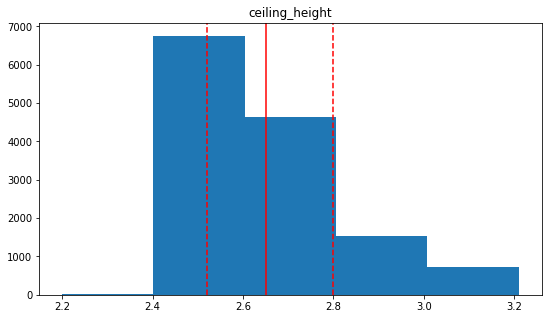

In [42]:
box_mustache_hist(data, 'ceiling_height', 5)

### 4.1.0. Гистограммы площади, цены, комнат, и высоты потолков <a class="anchor" id="section_4_1_0"></a>

Построим гистограммы по площади, цены, комнат, и высоты потолков по сырым данным.

Напишем функцию, автоматизирующую вывод графиков.

In [43]:
def build_hists (df, params, raw):
    for row in range(0, len(params)):
        if raw == True:
            plt.figure(figsize=(9,5))
            plt.title(params.loc[row]['field'])
            df[params.loc[row]['field']].hist(bins=params.loc[row]['bins'])
        elif raw == False:
            box_mustache_hist(df, params.loc[row]['field'], params.loc[row]['bins'])
        else:
            print('Parameter "raw" must be bool.')
        plt.show()

Построим гистограммы по сырым данным.

In [44]:
hist_set_params_raw = pd.DataFrame({
    'field': ['total_area','last_price','rooms','ceiling_height'],
    'bins': [100, 100, 20, 100],
})
hist_set_params_raw

,field,bins
0,total_area,100
1,last_price,100
2,rooms,20
3,ceiling_height,100


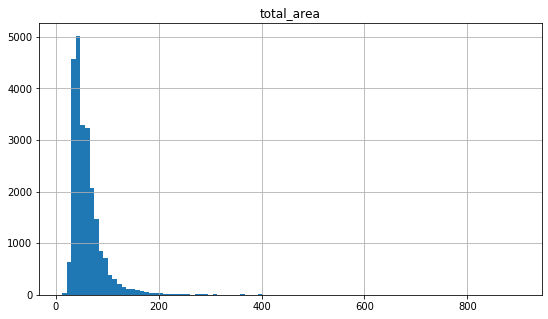

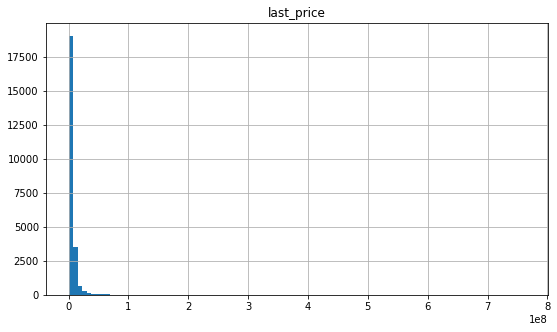

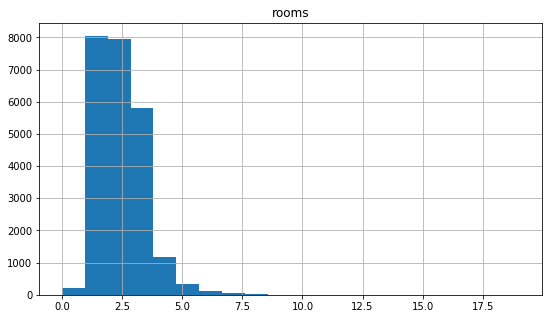

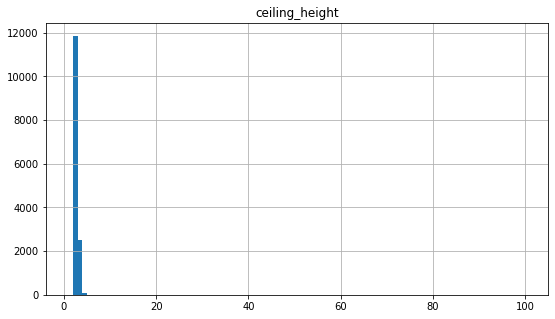

In [45]:
build_hists (data, hist_set_params_raw, True)

Построим гистограммы по ящику с усами.

In [46]:
hist_set_params = pd.DataFrame({
    'field': ['total_area','last_price','rooms','ceiling_height'],
    'bins': [20, 20, 4, 12],
})
hist_set_params

,field,bins
0,total_area,20
1,last_price,20
2,rooms,4
3,ceiling_height,12


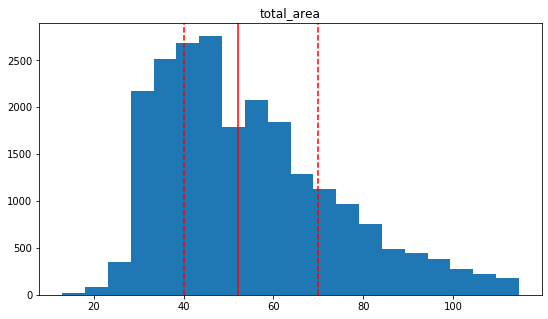

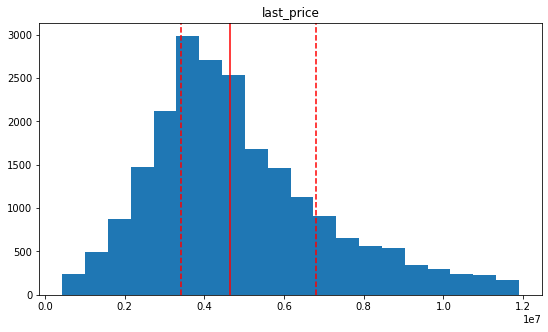

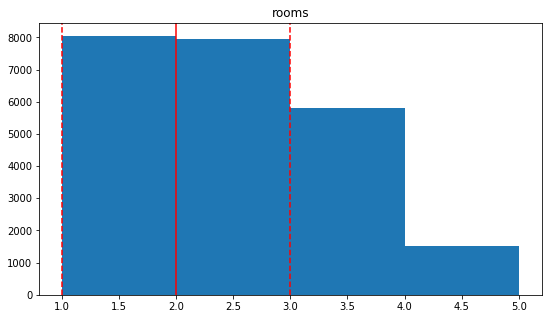

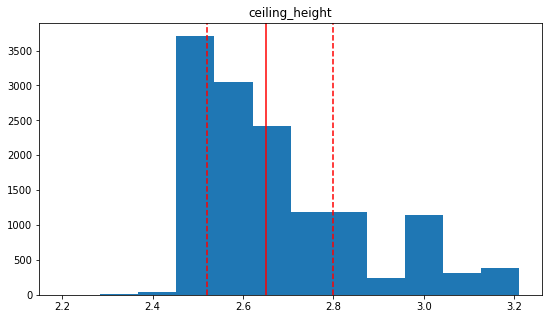

In [47]:
build_hists (data, hist_set_params, False)

### Выводы по построенным гистограммам

### 4.1.1. Площадь <a class="anchor" id="section_4_1_1"></a>

Большинство квартир имеют площадь до 100 м^2. Объявления о продаже жилья более 200 м^2 встречаются уже совсем редко. Есть длинный хвост вправо, как мы знаем по результатам data.describe() из-за максимального значения в 900 м^2.

В результате выполнения метода describe() из шага 1 нам известно, что:
- 60 м^2 - средняя площадь
- 52 м^2 - медианная площадь

Больше всего распространены квартиры площадью от до 70 м^2. Квартиры площадью больше 120 м^2 встречаются редко.

Посмотрим, каких площадей бывают студии и как сильно они распространены:

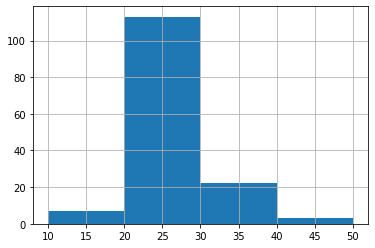

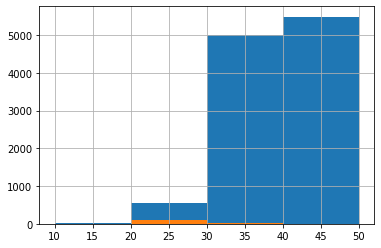

In [48]:
data[data['studio'] == True]['total_area'].hist(bins=4, range=(10,50))
plt.show()
data[data['studio'] == False]['total_area'].hist(bins=4, range=(10,50))
data[data['studio'] == True]['total_area'].hist(bins=4, range=(10,50))

Есть квартиры с жилой площадью меньше 30. Большинство из них - квартиры, не являющиеся студиями. Болльшинство жилья имеет площадь больше 30 м^2, о чём свидетельствует всплеск в районе этого значения. Есть пик между 40 и 50.

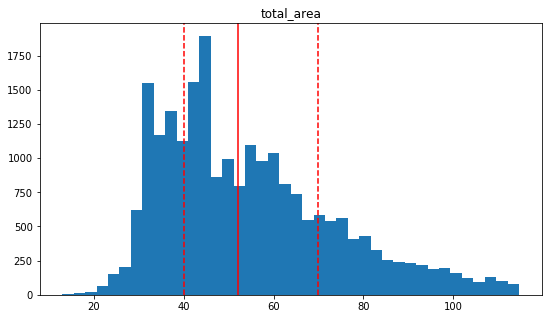

In [49]:
box_mustache_hist(data, 'total_area', 40)

3 пика на 32, 46, 61 предположительно могут свидетельствовать о наиболее распространенных значениях в 3-х группах: 1-комнатные, 2-комнатные, 3-комнатные квартиры. Спад в количестве объявлений в районе 84 и 85 вероятно свидетельствует о 4-й группе - 4-комнатные.

### 4.1.2. Цена <a class="anchor" id="section_4_1_2"></a>

Большинство значений до 20 млн. Исключили редкие значения

Из шага 1 нам известно, что:
- 6.5 млн - средняя цена
- 4.6 млн - медианная цена

Построим диаграмму размаха.

Больше всего распространены квартиры стоимостью до 6.8 млн. Квартиры стоимостью больше 12 млн встречаются редко.

Распределение похоже на Пуассоновское.

Самое большое количество объявлений между 3,5 и 4 млн.

### 4.1.3. Число комнат<a class="anchor" id="section_4_1_3"></a>

Из шага 1 нам известно, что:
- 2 - среднее число комнат
- 2 - медианное число комнат


Больше всего распространены квартиры c числом комнат до 3-х. Квартиры, в которых больше 6 комнат встречаются редко.

В основном в объявлениях превалируют 1,2,3-комнатные квартиры. Наши предположения относительно связи площадей и комнат из пункта 4.1.1 подтвердилось за исключением группы между 90 и 110 м^2. Всё-таки 4-комнатные квартиры площадью больше 110 м^2.

### 4.1.4. Высота потолков<a class="anchor" id="section_4_1_4"></a>

Из шага 1 нам известно, что:
- 2.8 - средняя высота потолков
- 2.6 - медианная высота потолков

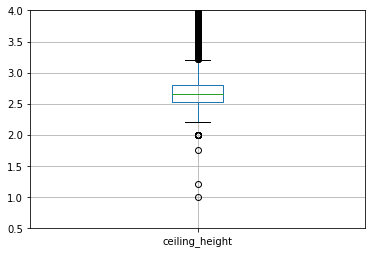

In [50]:
plt.ylim(0.5, 4)
data.boxplot(column='ceiling_height') 

Из сырых данных можно было бы сделать вывод, что хоббиты существуют! После того, как мы отбросили лишнее, выяснилось, что больше всего распространены квартиры высотой до 2.8 метров. Квартиры выше 3.2 метров встречаются редко.

Минимальная высота потолка по СНиП - 2.5 метра. Видимо поэтому пик значений - 2.5. Отбросим всё, что ниже 2.5, т.к. такие значения слишком редки. Рассмотрим отдельно диапазоны 2.5-3.5 и 3.5-4.5.

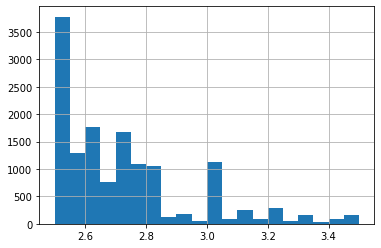

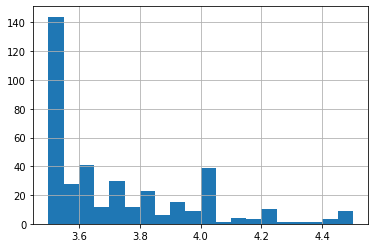

In [51]:
data['ceiling_height'].hist(bins=20, range=(2.5,3.5))
plt.show()
data['ceiling_height'].hist(bins=20, range=(3.5,4.5))

Мы получили два очень похожих распределения. Большинство значений попадают в первые 7 корзин до 2.85 метров. В первом диапазоне есть выбивается из общей картины значение на 3 метрах. Во втором - на 4-х. Вероятно при строительстве домов люди тяготеют к круглым значениям. Где 2.9, там и 3, где 3.9, там и 4.

## 4.2. Время продажи квартиры<a class="anchor" id="section_4_2"></a>

На первом шаге при помощи метода describe() мы определили, что:
- 181 день - среднее время продажы
- 95 дней - медиана

К тому же судя по стандартному отклонению, значения в столбце отличаются от среднего на 220 - более чем в 2 раза:

In [52]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Построим гистограмму количества дней от размещения до снятия объявления.

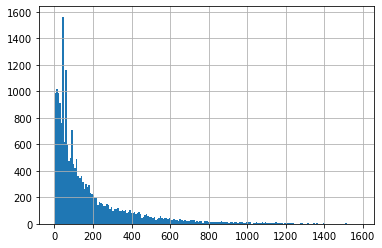

In [53]:
data['days_exposition'].hist(bins=200)

Построим ящик с усами.

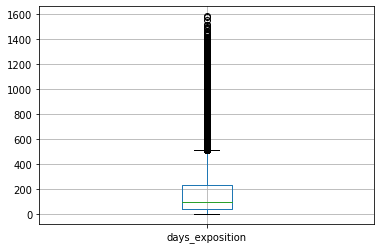

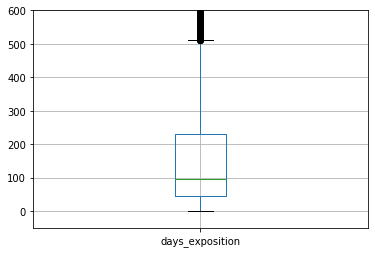

In [54]:
data.boxplot(column='days_exposition') 
plt.show()
plt.ylim(-50, 600)
data.boxplot(column='days_exposition') 

Из диаграммы размаха видно, что обычно продажа квартиры занимает до 230 дней. Необычно быстрыми считаются продажи до 50 дней, а необычно долгими - больше 500 дней. По гистограмме видно, что дольше 1000 дней квартиры продают редко. Посмотрим, сколько данных мы потеряем, если отбросим их.

In [55]:
len(data.query('(days_exposition >= 1000)&(days_exposition != "NaN")'))\
/ len(data.query('days_exposition != "NaN"'))

0.01354907885758846

Отбросив эти значения, мы не потеряем много данных. Нетипично долгие времена продажи квартир (>=1000) признаем выбросами и вдальнейшем отбросим.

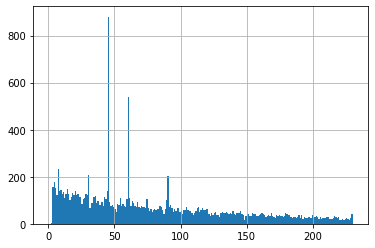

In [56]:
data['days_exposition'].hist(bins=230, range=(0,230))

Есть выбросы, не укладывающиеся в общую картину. Такое впечатление, что объявления массово закрывались в некоторые из дней. Выясним, в какие.

In [57]:
days_exposition_group = data.groupby('days_exposition')['days_exposition'].count()
days_exposition_group.sort_values(ascending=False).head(10)

days_exposition
45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64

Следующие дни выбиваются из общей массы по количеству закрытых объявлений: 7, 30, 45, 60, 90. 

In [58]:
#good_data = data.query('days_exposition not in(7,30,45,60,90)')
#good_data['days_exposition'].hist(bins=100, range=(0,200))
data.loc[data.loc[:,'days_exposition'].isin((7,30,45,60,90))]['days_exposition'].value_counts()

60.0    538
7.0     234
30.0    208
Name: days_exposition, dtype: int64

Есть 60, 7 и 30. Странно. Куда делись 45 и 90? Попробуем по-другому.

In [59]:
data.query('(days_exposition > 45)&(days_exposition < 46) \
           |(days_exposition > 90)&(days_exposition < 91)')['days_exposition'].value_counts()

45.0    880
90.0    204
Name: days_exposition, dtype: int64

Видимо в наших данных крылась ещё одна проблема. Округлим данные в столбце **days_exposition** до 0 знаков после запятой. Выполним value_counts() ещё раз.

In [60]:
data['days_exposition'] = data['days_exposition'].round(0)
data.loc[data.loc[:,'days_exposition'].isin((7,30,45,60,90))]['days_exposition'].value_counts()

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
Name: days_exposition, dtype: int64

Теперь value_counts() выдаёт все результаты правильно. Наличию таких часто встречающихся значений должно быть какое-то объяснение. Возможно, квартиры массово покупала какая-то компания-посредник, или, что более вероятно, они закрывались автоматически по какой-то причине. Например, фактически квартира была куплена ранее, но информации об этом не было (отсутствовала дата завершения). И либо программа, либо администратор закрывал их тем днём, когда это выяснилось.

## 4.3. Редкие и выбивающиеся значения<a class="anchor" id="section_4_3"></a>

Для того, чтобы нам изучить зависимость цены от площади, числа комнат и удалённости от центра, сделаем выборку good_data, где оставим только нормальные значения.

In [61]:
len(data.query('(total_area < 120)\
&(last_price < 12000000)\
&(rooms > 0)&(rooms <= 6)\
')) / len(data)

0.9015570277226888

В исследовании зависимости цены от площади и числа комнат будем делать выводы на 90% данных.

In [62]:
good_rooms_data = data[['locality_name','last_price','total_area','rooms',\
                        'cityCenters_nearest', 'floor',\
                        'floor_name','year_exposition',\
                        'month_exposition','weekday_exposition',\
                       'sqr_meter_price','cityCenters_nearest_km',\
                       'living_total_ratio','kitchen_total_ratio']]\
.query('(total_area < 120)\
&(last_price < 12000000)\
&(rooms > 0)&(rooms <= 6)\
')
good_rooms_data[['last_price','total_area','rooms']].describe()

,last_price,total_area,rooms
count,2.136600e+04,21366.000000,21366.000000
mean,4.847146e+06,53.104760,1.936441
std,2.215023e+06,17.981616,0.879910
min,1.219000e+04,12.000000,1.000000
25%,3.330000e+06,39.100000,1.000000
50%,4.400000e+06,49.500000,2.000000
75%,6.000000e+06,63.500000,3.000000
max,1.199900e+07,119.800000,6.000000


Изучим столбец **cityCenters_nearest** на наличие выбросов и оставим нормальные значения.

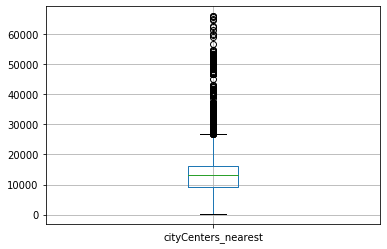

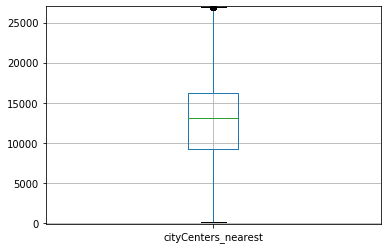

In [63]:
data.boxplot(column='cityCenters_nearest') 
plt.show()
plt.ylim(-50, 27000)
data.boxplot(column='cityCenters_nearest') 

In [64]:
len(data.query('(last_price < 12000000)\
&(cityCenters_nearest != "NaN")&(cityCenters_nearest < 27000)\
')) / len(data)

0.6135279969618971

In [65]:
good_center_data = data[['last_price','cityCenters_nearest']].query('(last_price < 12000000)\
&(cityCenters_nearest != "NaN")&(cityCenters_nearest < 27000)\
')
good_center_data[['last_price','cityCenters_nearest']].describe()

,last_price,cityCenters_nearest
count,1.454000e+04,14540.000000
mean,5.617829e+06,12672.428198
std,2.118045e+06,4932.099041
min,1.219000e+04,208.000000
25%,4.000000e+06,9931.750000
50%,5.100000e+06,12999.000000
75%,6.800000e+06,15643.000000
max,1.199900e+07,26989.000000


В исследовании зависимости цены от удалённости от центра будем делать выводы на 61% данных.

## 4.4. Факторы, влияющие на стоимость квартиры<a class="anchor" id="section_4_4"></a>

### 4.4.1. Цена от площади<a class="anchor" id="section_4_4_1"></a>

Построим диаграмму рассеяния и найдем коэффициент корреляции.

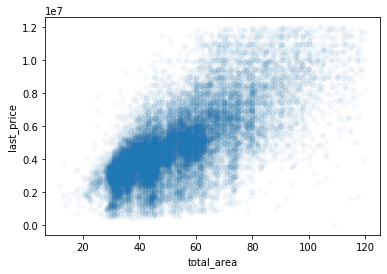

In [66]:
good_rooms_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03) 

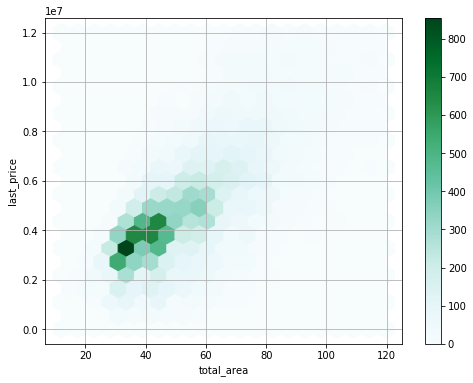

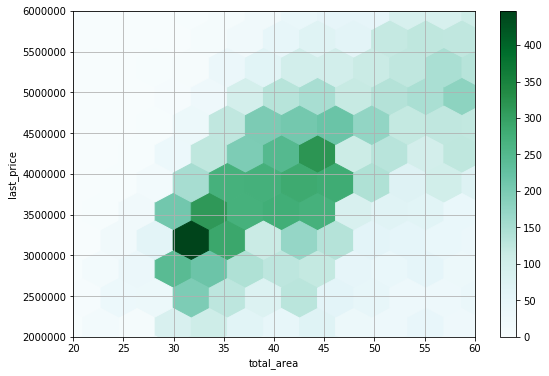

In [67]:
good_rooms_data.plot(x='total_area', y='last_price', kind='hexbin',\
                     gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
plt.show()
good_rooms_data.plot(x='total_area', y='last_price', kind='hexbin',\
                     gridsize=30, figsize=(9, 6), sharex=False, grid=True, xlim=(20,60), ylim=(2000000,6000000) ) 

In [68]:
good_rooms_data['total_area'].corr(good_rooms_data['last_price'])

0.6970700164137711

На диаграмме рассеяния видно, что чаще всего продаются квартиры стоимостью от 3 до 3.5 миллионов и площадью от 30 до 35 метров квадратных. Чем больше и дороже квартиры, тем реже их покупают.

Есть прямая корреляция цены от площади.

### 4.4.2. Цена от числа комнат<a class="anchor" id="section_4_4_2"></a>

Построим диаграмму рассеяния и найдем коэффициент корреляции.

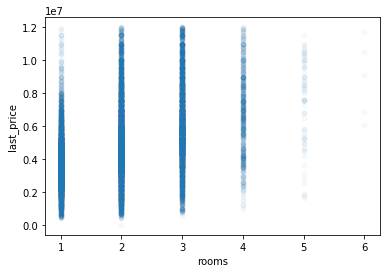

In [69]:
good_rooms_data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.03) 

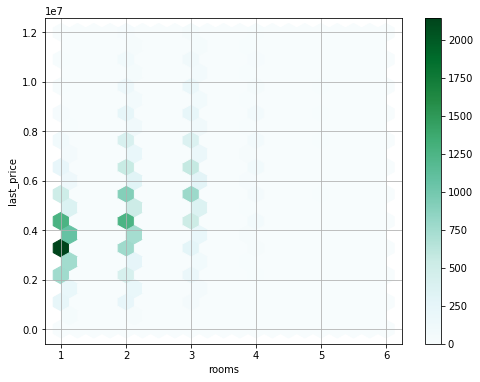

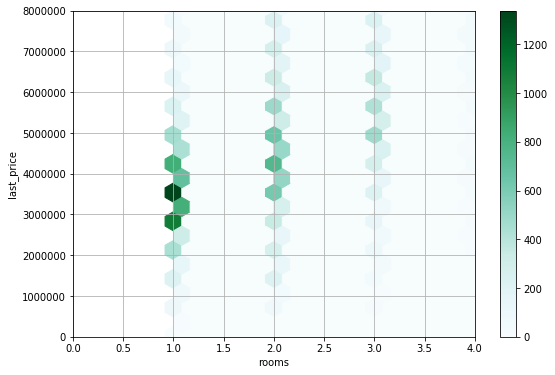

In [70]:
good_rooms_data.plot(x='rooms', y='last_price', kind='hexbin',\
                     gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
plt.show()
good_rooms_data.plot(x='rooms', y='last_price', kind='hexbin',\
                     gridsize=30, figsize=(9, 6), sharex=False, grid=True, xlim=(0,4), ylim=(0,8000000) ) 

In [71]:
good_rooms_data['rooms'].corr(good_rooms_data['last_price'])

0.4328251221714601

На диаграмме рассеяния видно, что чаще всего продаются 1-комнатные квартиры стоимостью от 3 до 3.5 миллионов. Чем больше в квартире комнат, тем дороже квартиры, тем реже их покупают.

Корреляция цены от количества комнат есть, но не слишком сильная. Больше влияет площадь.

### 4.4.3. Цена от расстояния до центра<a class="anchor" id="section_4_4_3"></a>

Построим диаграмму рассеяния и найдем коэффициент корреляции.

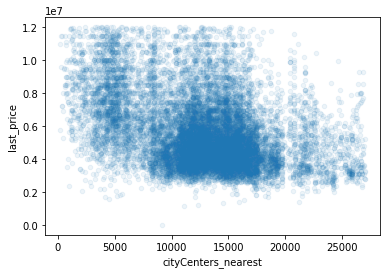

In [72]:
good_center_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.08) 

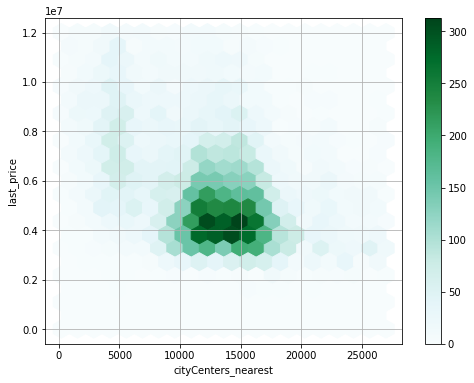

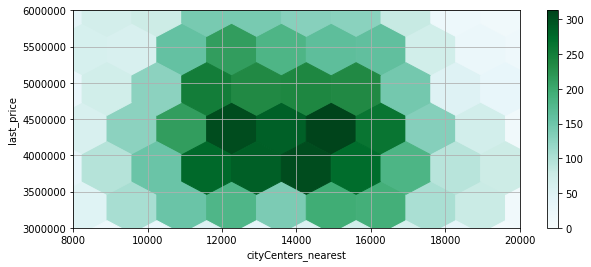

In [73]:
good_center_data.plot(x='cityCenters_nearest', y='last_price', kind='hexbin',\
                     gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
plt.show()
good_center_data.plot(x='cityCenters_nearest', y='last_price', kind='hexbin',\
                     gridsize=20, figsize=(10, 4), sharex=False, grid=True, xlim=(8000,20000), ylim=(3000000,6000000) ) 

In [74]:
good_center_data['cityCenters_nearest'].corr(good_rooms_data['last_price'])

-0.3742012958452169

На диаграмме рассеяния видно, что чаще всего продаются квартиры стоимостью от 3.5 до 4.5 миллионов, которые находятся в 11-15 км от центра. 
Корреляция цены от расстояния отрицательная. Но на 1-й диаграмме видно, что квартиры, близкие к центру есть, их не часто покупают, и они дороже, чем большинство предложений. Однако, такие же квартиры есть и на далёких от центра расстояниях. Нужно отдельно исследовать Санкт-Петербург.

### 4.4.4. Цена от этажа<a class="anchor" id="section_4_4_4"></a>

Построим график зависимости средней цены на жильё от этажа.

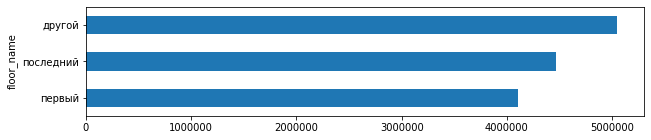

In [75]:
good_rooms_data.groupby('floor_name')['last_price'].mean()\
.sort_values().plot(kind='barh', figsize=(10,2))

На графике видно, что квартиры на первом и последнем этажах в среднем стоят дешевле.

### 4.4.5. Цена продажи от даты размещения<a class="anchor" id="section_4_4_5"></a>

Построим диаграмму рассеяния.

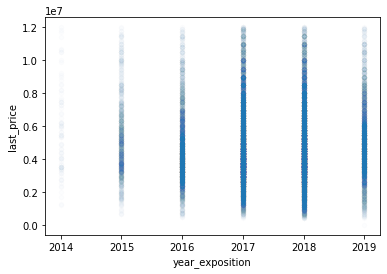

In [76]:
good_rooms_data.plot(x='year_exposition', y='last_price', kind='scatter', alpha=0.01) 

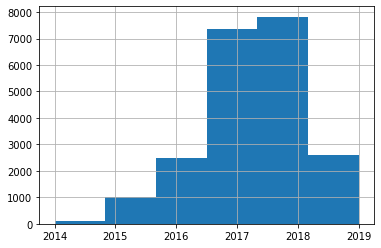

In [77]:
good_rooms_data['year_exposition'].hist(bins=6)

Исключим 2014 и 2015 года для вычисления цены продажи, т.к. в них мало записей. Возможно, гистограмма говорит о росте популярности ресурса по размещению объявлений. Меньшее количество в 2019 обусловлено тем, что данные представлены по май.

Построим три графика - зависимость медианной стоимости квартир от года размещения (и месяца для большей детализации), цены от месяца и цены от дня недели.

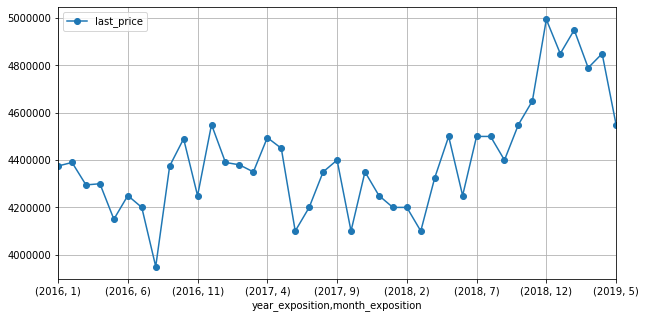

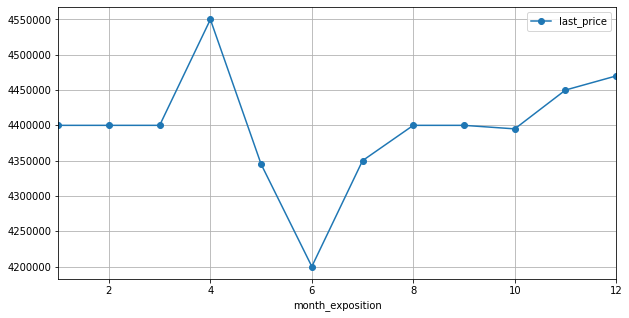

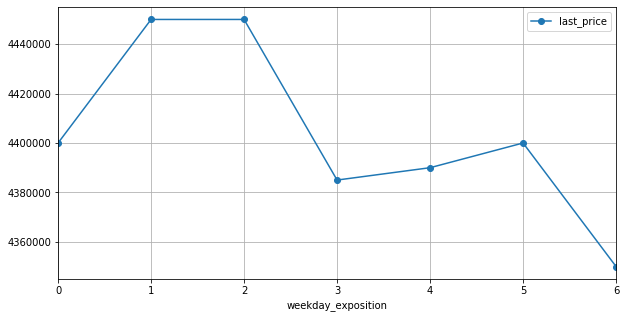

In [78]:
good_rooms_data\
            .query('year_exposition > 2015')\
            .pivot_table(index=('year_exposition','month_exposition'),\
                values='last_price', aggfunc='median')\
            .plot(grid=True, figsize=(10, 5),style='o-')
good_rooms_data\
            .query('year_exposition > 2015')\
            .pivot_table(index='month_exposition',\
                values='last_price', aggfunc='median')\
            .plot(grid=True, figsize=(10, 5),style='o-')
good_rooms_data\
            .query('year_exposition > 2015')\
            .pivot_table(index='weekday_exposition',\
                values='last_price', aggfunc='median')\
            .plot(grid=True, figsize=(10, 5),style='o-')

Квартиры продавались по более высоким ценам, если объявления размещались в конце 2018 - начале 2019 годах. При этом виден тренд по росту цены продажи год от года. По самым низким ценам продавались квартиры, размещенные в третьем квартале 2016 года.

Квартиры продавались по более высоким ценам, если объявления были размещены в апреле и декабре, и по более низким - в июне.

Квартиры продавались по более высоким ценам, если объявления были размещены во вторник или среду, и по более низким - в воскресенье.

## 4.5. Средняя цена за квадратный метр<a class="anchor" id="section_4_5"></a>

Найдём среднюю цену за квадратный метр в городах с самым большим количеством объявлений.

In [79]:
data_grouped = data.groupby('locality_name').count().\
sort_values(by='last_price',ascending=False).head(10)
data_grouped

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sqr_meter_price,year_exposition,month_exposition,weekday_exposition,floor_name,living_total_ratio,kitchen_total_ratio,cityCenters_nearest_km
locality_name,,,,,,,,,,,,,,,,,,,,,
Санкт-Петербург,15721,15721,15721,15721,15721,10104,15651,14581,15721,1833,...,7983,13638,15721,15721,15721,15721,15721,14581,14342,15660
поселок Мурино,556,556,556,556,556,214,552,492,556,73,...,2,551,556,556,556,556,556,492,450,2
Кудрово,472,472,472,472,472,195,470,424,472,57,...,0,441,472,472,472,472,472,424,389,0
поселок Шушары,440,440,440,440,440,217,439,404,440,58,...,152,408,440,440,440,440,440,404,398,436
Всеволожск,398,398,398,398,398,272,398,371,398,44,...,0,339,398,398,398,398,398,371,357,0
Пушкин,369,369,369,369,369,234,369,345,369,48,...,177,307,369,369,369,369,369,345,338,368
Колпино,338,338,338,338,338,203,338,328,338,44,...,190,308,338,338,338,338,338,328,322,337
поселок Парголово,327,327,327,327,327,137,327,301,327,41,...,56,302,327,327,327,327,327,301,289,327
Гатчина,307,307,307,307,307,149,307,292,307,44,...,0,268,307,307,307,307,307,292,294,0


In [80]:
top_10 = data_grouped.index
top_10

Index(['Санкт-Петербург', 'поселок Мурино', 'Кудрово', 'поселок Шушары',
       'Всеволожск', 'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина',
       'Выборг'],
      dtype='object', name='locality_name')

Посчитаем среднюю цену по сырым и отфильтрованным данным. И построим на одном графике.

In [81]:
sqr_meter_mean = data.query('locality_name in @top_10')\
.pivot_table(index='locality_name', \
             values='sqr_meter_price', aggfunc='mean').round(0)\
.sort_values(by='sqr_meter_price', ascending=False)
sqr_meter_mean

,sqr_meter_price
locality_name,
Санкт-Петербург,114849.0
Пушкин,103126.0
Кудрово,95325.0
поселок Парголово,90176.0
поселок Мурино,85682.0
поселок Шушары,78677.0
Колпино,75425.0
Гатчина,68746.0
Всеволожск,68654.0


In [82]:
sqr_meter_mean_good = good_rooms_data.query('locality_name in @top_10')\
.pivot_table(index='locality_name',\
             values='sqr_meter_price', aggfunc='mean').round(0)\
.sort_values(by='sqr_meter_price', ascending=False)
sqr_meter_mean_good

,sqr_meter_price
locality_name,
Санкт-Петербург,105588.0
Пушкин,100397.0
Кудрово,94969.0
поселок Парголово,90448.0
поселок Мурино,85004.0
поселок Шушары,78394.0
Колпино,75222.0
Гатчина,68664.0
Всеволожск,67163.0


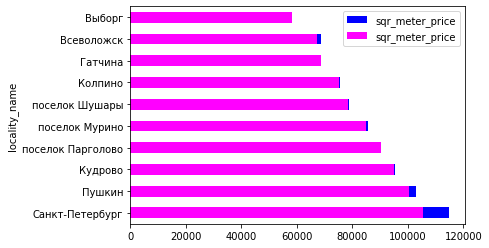

In [83]:
ax = sqr_meter_mean.plot(kind='barh', label='raw',linewidth=5, color='blue')
sqr_meter_mean_good.plot(kind='barh', ax=ax, label='filtered',linewidth=5, color='magenta')

Средняя цена квадратного метра больше всего в Санкт-Петербурге (105588 р.). Самая низкая - в Выборге (58230). При этом в Питере и Пушкине больше всего отсеянных нами квартир дороже 12 млн. На 3-м месте - Всеволожск (региональный центр Ленобласти).

## 4.6.  Граница центра Санкт-Петербурга<a class="anchor" id="section_4_6"></a>

In [84]:
data.query('locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sqr_meter_price,year_exposition,month_exposition,weekday_exposition,floor_name,living_total_ratio,kitchen_total_ratio,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,755.0,NaN,120370.0,2019,3,3,другой,0.47,0.23,16.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,574.0,558.0,92786.0,2015,8,3,другой,0.61,0.15,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,234.0,424.0,408176.0,2015,7,4,другой,NaN,NaN,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,100000.0,2018,6,1,другой,0.32,0.41,8.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,NaN,NaN,110545.0,2019,4,3,другой,NaN,0.26,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,NaN,...,652.0,29.0,100567.0,2018,2,2,другой,0.46,0.26,16.0
23690,3,5500000.0,52.00,2018-07-19,2,NaN,5.0,31.0,2,NaN,...,NaN,15.0,105769.0,2018,7,3,другой,0.60,0.12,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,NaN,...,806.0,519.0,129904.0,2016,10,3,другой,0.55,0.15,4.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,381.0,NaN,72491.0,2017,3,1,другой,0.55,0.10,4.0


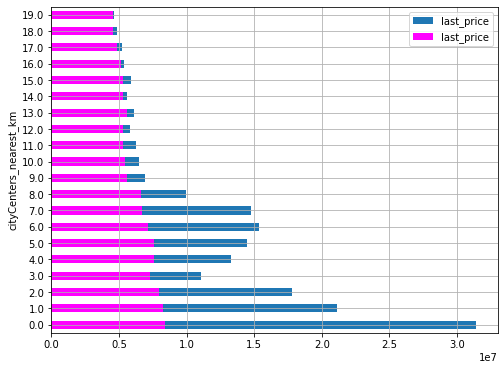

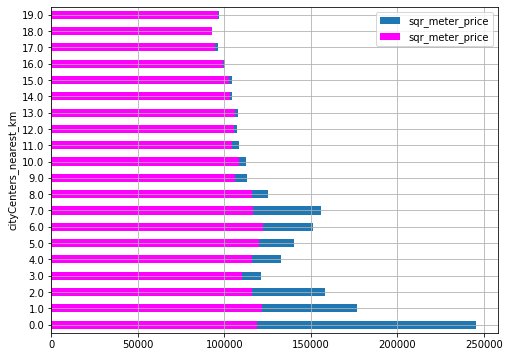

In [85]:
ax = data.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')\
.sort_values(by='cityCenters_nearest_km', ascending=True).head(20)\
.plot(kind='barh', label='raw',figsize=(8, 6))

good_rooms_data.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')\
.sort_values(by='cityCenters_nearest_km', ascending=True).head(20)\
.plot(kind='barh', label='filtered', figsize=(8, 6), ax=ax, color='magenta', grid=True)

plt.show()

ax = data.pivot_table(index='cityCenters_nearest_km', values='sqr_meter_price', aggfunc='mean')\
.sort_values(by='cityCenters_nearest_km', ascending=True).head(20)\
.plot(kind='barh', label='raw',figsize=(8, 6))

good_rooms_data.pivot_table(index='cityCenters_nearest_km', values='sqr_meter_price', aggfunc='mean')\
.sort_values(by='cityCenters_nearest_km', ascending=True).head(20)\
.plot(kind='barh', label='filtered', figsize=(8, 6), ax=ax, color='magenta', grid=True)

График меняется уже на 8 км от центра. Более дорогих квартир становится резко больше, о чем свидетельствует среднее значение по необработанным данным. Посмотрим, что покажет медиана.

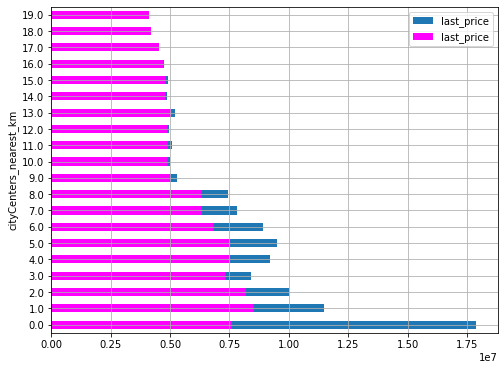

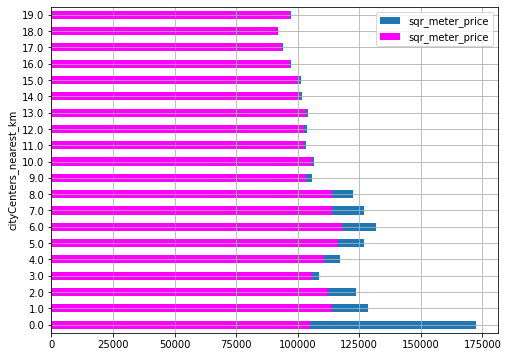

In [86]:
ex = data.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')\
.sort_values(by='cityCenters_nearest_km', ascending=True).head(20)\
.plot(kind='barh', label='raw',figsize=(8, 6))

good_rooms_data.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')\
.sort_values(by='cityCenters_nearest_km', ascending=True).head(20)\
.plot(kind='barh', label='filtered', figsize=(8, 6), ax=ex, color='magenta', grid=True)

plt.show()

ex = data.pivot_table(index='cityCenters_nearest_km', values='sqr_meter_price', aggfunc='median')\
.sort_values(by='cityCenters_nearest_km', ascending=True).head(20)\
.plot(kind='barh', label='raw',figsize=(8, 6))

good_rooms_data.pivot_table(index='cityCenters_nearest_km', values='sqr_meter_price', aggfunc='median')\
.sort_values(by='cityCenters_nearest_km', ascending=True).head(20)\
.plot(kind='barh', label='filtered', figsize=(8, 6), ax=ex, color='magenta', grid=True)

Медиана свидетельствует о тех же 8 км.

## 4.7. Квартиры в центре Санкт-Петербурга<a class="anchor" id="section_4_7"></a>

Создадим срез данных в центре.

In [87]:
center_data = data.query('cityCenters_nearest_km <= 8')

### 4.7.1. Цена в ценре от площади<a class="anchor" id="section_4_7_1"></a>

Построим диаграмму рассеяния и найдем коэффициент корреляции.

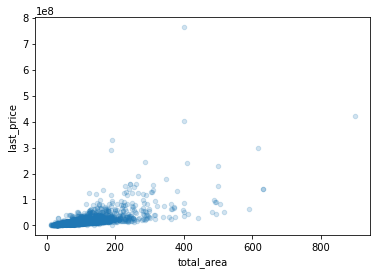

In [88]:
center_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2) 

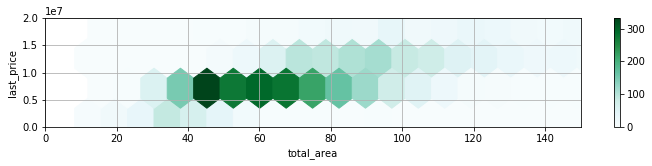

In [89]:
center_data.plot(x='total_area', y='last_price', kind='hexbin',\
                     gridsize=120, figsize=(12, 2), sharex=False, grid=True, xlim=(0,150),ylim=(0,20000000))  

In [90]:
center_data['total_area'].corr(good_rooms_data['last_price'])

0.710766852974075

На диаграмме рассеяния видно, что в центре чаще всего продаются квартиры стоимостью от 5 до 10 миллионов и площадью от 40 до 50 метров квадратных. 

Есть прямая корреляция цены от площади.

### 4.7.2. Цена в ценре от числа комнат<a class="anchor" id="section_4_7_2"></a>

Построим диаграмму рассеяния и найдем коэффициент корреляции.

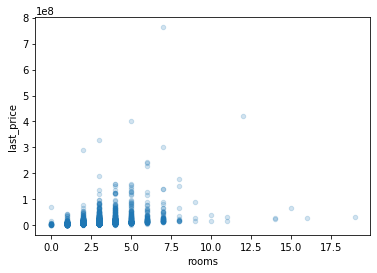

In [91]:
center_data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.2) 

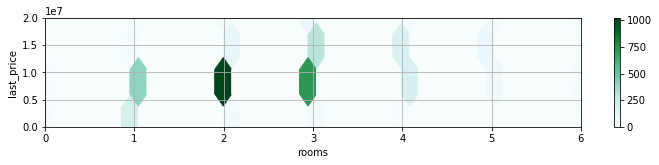

In [92]:
center_data.plot(x='rooms', y='last_price', kind='hexbin',\
                     gridsize=100, figsize=(12, 2), sharex=False, grid=True, xlim=(0,6),ylim=(0,20000000))  

In [93]:
center_data['rooms'].corr(good_rooms_data['last_price'])

0.4519647015690445

На диаграмме рассеяния видно, что в центре чаще всего продаются 2,3-комнатные квартиры стоимостью от 5 до 12 миллионов.

Есть прямая корреляция цены от площади, не очень сильная.

### 4.7.3. Высота потолков<a class="anchor" id="section_4_7_3"></a>

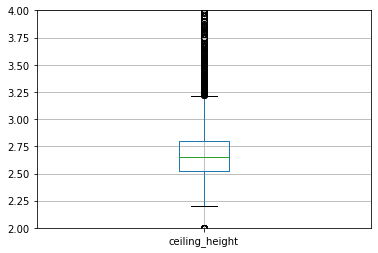

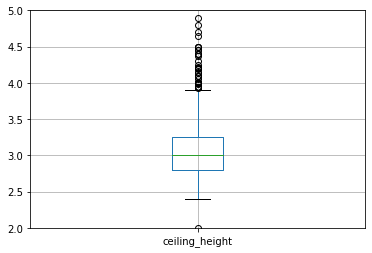

In [94]:
plt.ylim(2,4)
data.boxplot(column='ceiling_height') 
plt.show()
plt.ylim(2,5)
center_data.boxplot(column='ceiling_height') 

В центре потолки выше. Здесь 3 метра и выше - в порядке вещей.

Построим матрицу диаграмм рассеяния, чтобы изучить оставшиеся зависимости.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7d56b39d0>,
      dtype=object)

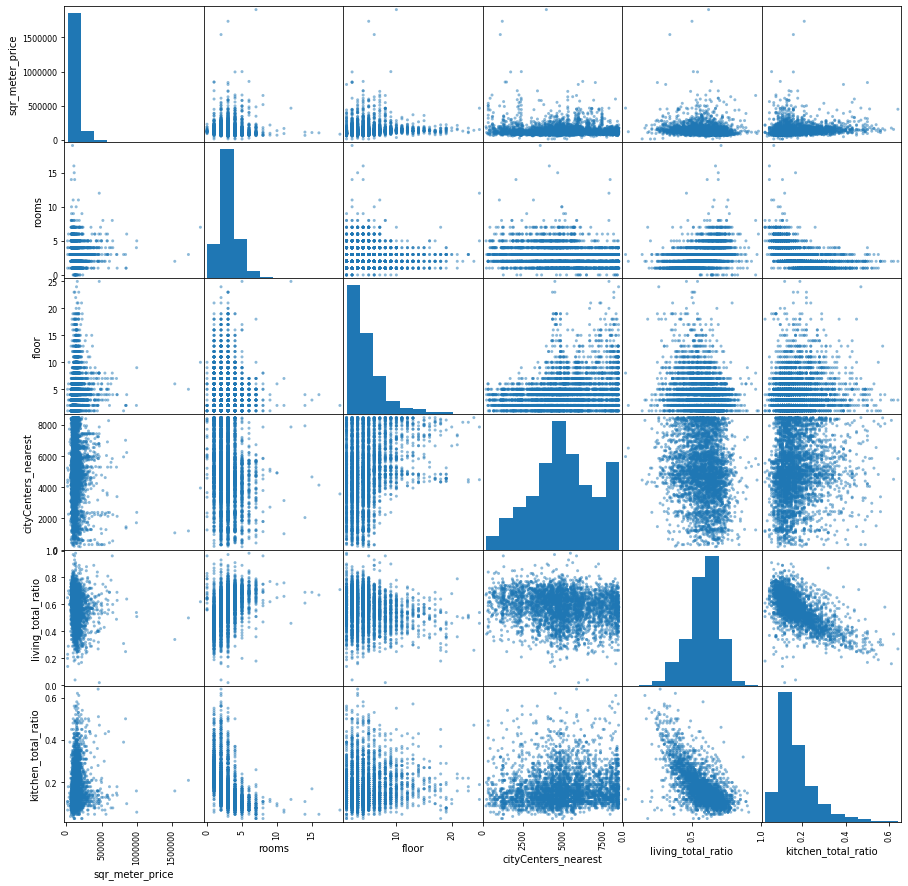

In [95]:
pd.plotting.scatter_matrix(center_data[['sqr_meter_price','rooms','floor','cityCenters_nearest',\
                                       'living_total_ratio','kitchen_total_ratio']], figsize=(15, 15))

In [96]:
center_data[['sqr_meter_price','rooms','floor','cityCenters_nearest',\
             'living_total_ratio','kitchen_total_ratio']].corr()

,sqr_meter_price,rooms,floor,cityCenters_nearest,living_total_ratio,kitchen_total_ratio
sqr_meter_price,1.000000,0.012555,0.113774,-0.062607,-0.149520,0.141611
rooms,0.012555,1.000000,-0.049335,-0.207661,0.406592,-0.487191
floor,0.113774,-0.049335,1.000000,0.280753,-0.213578,0.079510
cityCenters_nearest,-0.062607,-0.207661,0.280753,1.000000,-0.141268,0.081827
living_total_ratio,-0.149520,0.406592,-0.213578,-0.141268,1.000000,-0.673157
kitchen_total_ratio,0.141611,-0.487191,0.079510,0.081827,-0.673157,1.000000


По матрице диаграмм рассеяния можно сделать следующие дополнительные наблюдения:
- Чем ближе к центру города, тем меньше этажей. Больше всего 2-комнатных квартир. Больше всего квартир в 5 км от центра. 
- Чем больше комнат, тем дороже метр квадратный.
- Чем больше кухня, тем меньше жилая площадь. Чем меньше кухня, тем больше жилая площадь.
- Более распространены небольшие кухни относительно общей площади.

### 4.7.4. Цена продажи квартиры в центре от даты размещения<a class="anchor" id="section_4_7_4"></a>

Построим гистограмму.

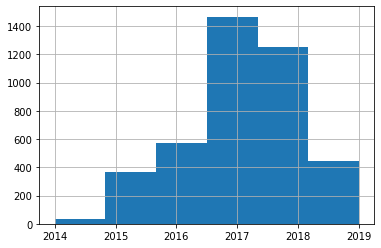

In [97]:
center_data['year_exposition'].hist(bins=6)

Исключим 2014 и 2015 года для вычисления цены продажи, т.к. в них мало записей. Возможно, гистограмма говорит о росте популярности ресурса по размещению объявлений. Меньшее количество в 2019 обусловлено тем, что данные представлены по май.

Построим три графика - зависимость медианной стоимости квартир от года размещения (и месяца для большей детализации), цены от месяца и цены от дня недели.

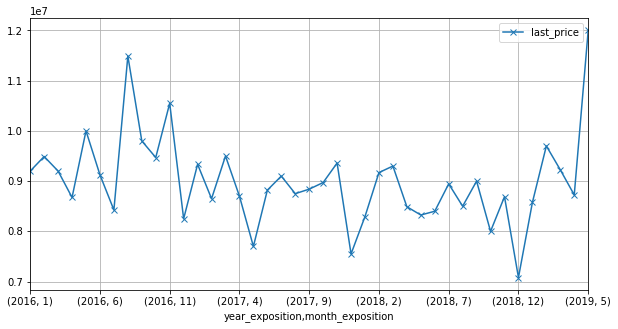

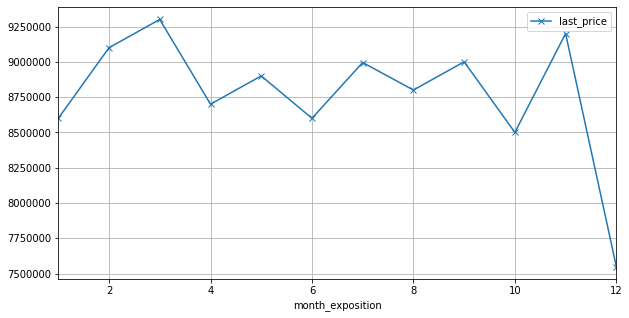

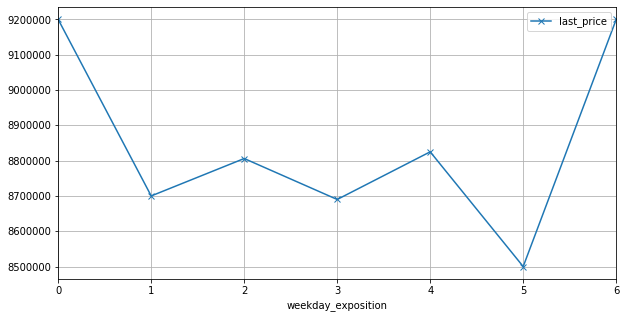

In [98]:
center_data\
            .query('year_exposition > 2015')\
            .pivot_table(index=('year_exposition','month_exposition'),\
                values='last_price', aggfunc='median')\
            .plot(grid=True, figsize=(10, 5),style='x-')
center_data\
            .query('year_exposition > 2015')\
            .pivot_table(index='month_exposition',\
                values='last_price', aggfunc='median')\
            .plot(grid=True, figsize=(10, 5),style='x-')
center_data\
            .query('year_exposition > 2015')\
            .pivot_table(index='weekday_exposition',\
                values='last_price', aggfunc='median')\
            .plot(grid=True, figsize=(10, 5),style='x-')

Квартиры в центре продавались по более высоким ценам, если объявления размещались в третьем квартале 2016 и в начале 2019 года. По самым низким ценам продавались квартиры, размещенные в декабре 2018 года.

Квартиры продавались по более высоким ценам, если объявления были размещены в марте и по более низким - в декабре.

Квартиры продавались по более высоким ценам, если объявления были размещены в понедельник и воскресенье, и по более низким - в пятницу.

**Вывод.**

Посмотрим, как менялась цена за квадратный метр в Санкт-Петербурге и центре города.

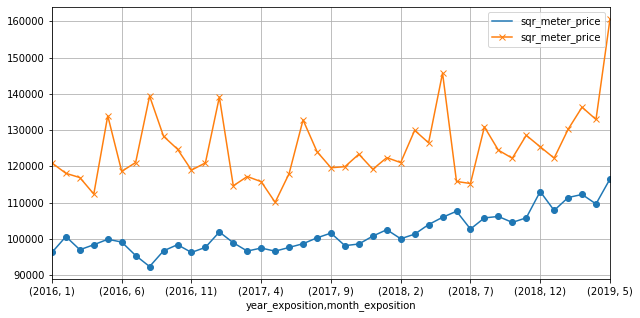

In [99]:
ax = good_rooms_data\
            .query('(year_exposition > 2015)&(locality_name == "Санкт-Петербург")')\
            .pivot_table(index=('year_exposition','month_exposition'),\
                values='sqr_meter_price', aggfunc='median')\
            .plot(grid=True, figsize=(10, 5),style='o-', label='region')
center_data\
            .query('year_exposition > 2015')\
            .pivot_table(index=('year_exposition','month_exposition'),\
                values='sqr_meter_price', aggfunc='median')\
            .plot(grid=True, figsize=(10, 5),style='x-',ax=ax, label='center')


Цена за квадратный метр в центре города всегда выше, чем в среднем по городу.

Квартиры в центре просторней и дороже, потолки выше, количество комнат больше.

# Шаг 5. Общий вывод.<a class="anchor" id="chapter5"></a>

Рабочие гипотезы:
- Расположение влияет на стоимость жилья.
- Площадь влияет на стоимость жилья.
- Число комнат влияет на стоимость жилья.
- Этаж влияет на стоимость жилья.
- Высота потолков влияет на стоимость жилья.

Результаты проверки гипотез:
- [x] Расположение действительно влияет на стоимость жилья. Мы выяснили, что чем ближе к Санкт-Петербургу, тем выше стоимость жилья. Такая же тенденция прослеживается внутри самого города - чем ближе к центру, тем жильё дороже.
- [x] Площадь и число комнат действительно влияют на стоимость жилья. Поэтому большинство может позволить себе однушки площадью 30-35 квадратных метров. Жителям центра по корману квартиры побольше, но и они в основном живут в 2-комнатных квартирах. Отчасти это может быть связано с тем, что в центре Питера распространён старый фонд, более просторные новостройки в центре преимущественно относятся к элитному жилью и стоят значительно дороже.
- [x] Этаж действительно влияет на стоимость жилья. Люди не очень любят жить на 1 и последнем этажах, видимо поэтому стоимость таких квартир как правило меньше.
- [x] Высота потолков действительно влияет на стоимость жилья. Мы построили графики, и посчитали медиану, чтобы убедиться и в этом предположении.

_____________________________________